# Introduction to Clustering

## Unsupervised Learning 
- A group of machine learning algorithms that find patterns in data
- Data for algorithms has not been labeled, classified or characterized.
- The objective of the algorithm is to interpret any structure in the data.

In [1]:
x = [9, 6, 2, 3, 1, 7, 1, 6, 1, 7, 23, 26, 25, 23, 21, 23, 23, 20, 30, 23]
y = [8, 4, 10, 6, 0, 4, 10, 10, 6, 1, 29, 25, 30, 29, 29, 30, 25, 27, 26, 30]

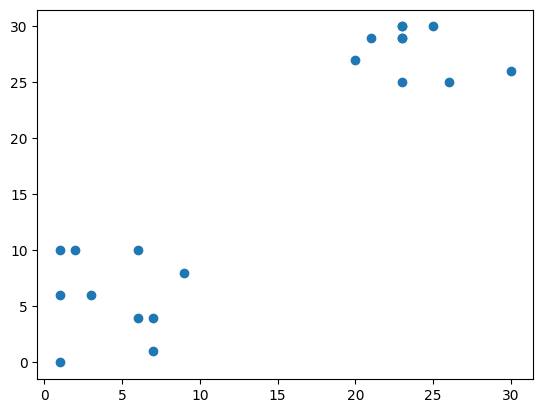

In [2]:
# Import plotting class from matplotlib library
from matplotlib import pyplot as plt

# Create a scatter plot
plt.scatter(x, y)

# Display the scatter plot
plt.show()

This helps visualize the natural clusters present in the data.

## Basics of cluster analysis

### Hierarchical clustering
![image-2](image-2.png)

- Step 1 
    - All the points are considered as individual clusters. 
    - A cluster center is a mean of attributes of all data points in a cluster. In this case, cluster centers will have two attributes - the mean of x and y coordinates.
    - At this stage, cluster centers of all clusters are the coordinates of the individual points.

![image-3](image-3.png)

- Step 2
    - The distances between all pairs of cluster centers are computed and the two closest clusters are merged.
    - The cluster center of the merged cluster is then recomputed.
    - This process of merging the two closest clusters continues until we arrive at the desired clusters. 
    - At every step, the number of clusters reduces by one.

![image-4](image-4.png)

- Step 3
    - Stopping at 3 clusters, this is how it looks.

In [3]:
# Hierarchical clustering in SciPy
from scipy.cluster.hierarchy import linkage,fcluster
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

x_coordinates = [80.1,93.1,86.6,98.5,86.4,9.5,15.2,3.4,
                10.4,20.3,44.2,56.8,49.2,62.5,44.0]

y_coordinates = [87.2,96.1,95.6,92.4,92.4,57.7,49.4,
                47.3,59.1,55.5,25.6,2.1,10.9,24.1,10.3]

df = pd.DataFrame({'x_coordinate': x_coordinates,
                  'y_coordinate': y_coordinates})

In [4]:
Z = linkage(df,'ward') # compute distance between intermediate clusters

# generate cluster and assign associated cluster labels to a new column in the DataFrame
df['cluster_labels'] = fcluster(Z,3,criterion='maxclust')

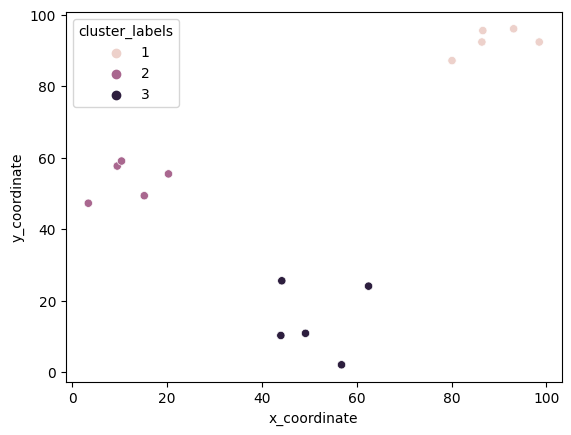

In [5]:
sns.scatterplot(x='x_coordinate', y='y_coordinate',
               hue='cluster_labels', data=df)
plt.show()

## K-Means clustering
![image-5](image-5.png)

- Step 1
    - A random cluster center is generated for each of the three clusters. 

![image-6](image-6.png)

- Step 2
    - The distance to these cluster centers is computed for each point to assign to the closest cluster. 

![image-7](image-7.png)

- Step 3
    - The cluster centers are recomputed. 
    - This iteration of assigning points to the recomputed cluster centers is performed a predefined number of times.

In [6]:
# K-means clustering in SciPy
from scipy.cluster.vq import kmeans, vq
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import random
random.seed((1000,2000))

x_coordinates = [80.1,93.1,86.6,98.5,86.4,9.5,15.2,3.4,
                10.4,20.3,44.2,56.8,49.2,62.5,44.0]

y_coordinates = [87.2,96.1,95.6,92.4,92.4,57.7,49.4,
                47.3,59.1,55.5,25.6,2.1,10.9,24.1,10.3]

df = pd.DataFrame({'x_coordinate': x_coordinates,
                  'y_coordinate': y_coordinates})

In [7]:
# the centroids of the clusters are computed using kmeans
# second argument is distortion, which is captured in dummy variable
centroids,_ = kmeans(df,3) 

centroids,_

(array([[51.34, 14.6 ],
        [88.94, 92.74],
        [11.76, 53.8 ]]),
 8.043798809666301)

In [8]:
# cluster assignment through each point are done through vq
# second argument is distortion, which is captured in dummy variable
df['cluster_labels'], _ = vq(df,centroids)

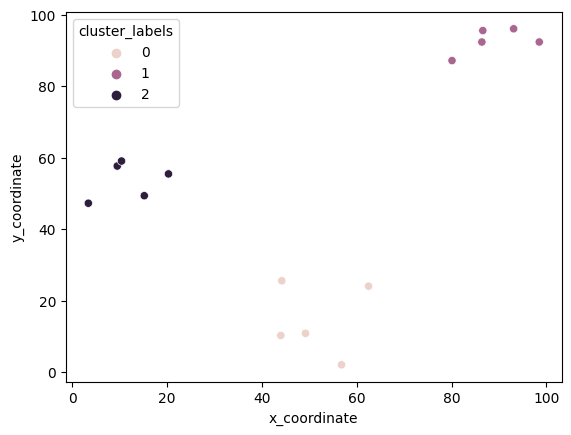

In [9]:
sns.scatterplot(x='x_coordinate', y='y_coordinate',
               hue='cluster_labels', data=df)
plt.show()

## Data preparation for cluster analysis
- Data in raw for may lead to bias in clustering
- Clusters may be heavily dependent on one variable
- Solution: normalization of individual variables

### Normalization
Normalization: process of rescaling data to a standard deviation of 1

x_new = x / std_dev(x)

In [10]:
# normalization
from scipy.cluster.vq import whiten
data = [5,1,3,3,2,3,3,8,1,2,2,3,5]
scaled_data = whiten(data)
print(scaled_data)

[2.72733941 0.54546788 1.63640365 1.63640365 1.09093577 1.63640365
 1.63640365 4.36374306 0.54546788 1.09093577 1.09093577 1.63640365
 2.72733941]


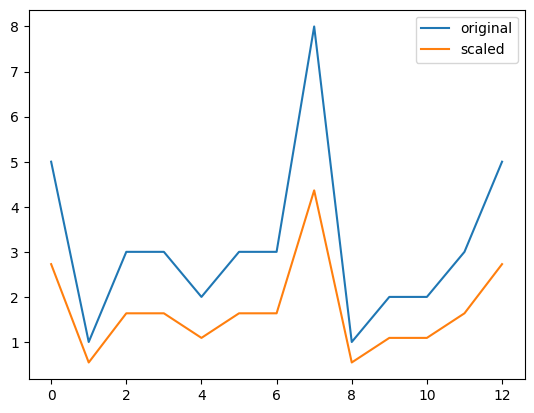

In [11]:
# illustration of normalization

plt.plot(data,
        label='original')
plt.plot(scaled_data,
        label='scaled')

plt.legend()
plt.show()

# FIFA 18: Normalize data

In [14]:
fifa = pd.read_csv('datasets/fifa_18_sample_data.csv')
fifa.shape

(1000, 185)

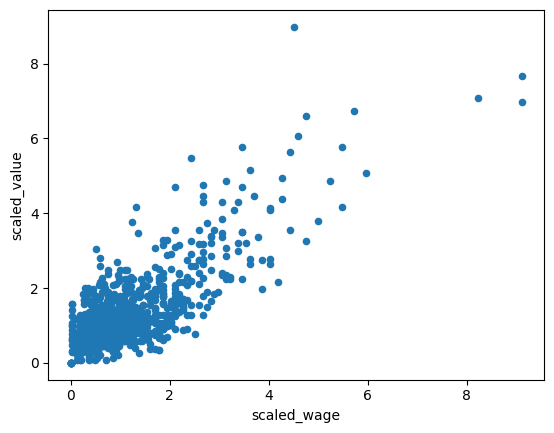

       scaled_wage  scaled_value
count  1000.000000   1000.000000
mean      1.119812      1.306272
std       1.000500      1.000500
min       0.000000      0.000000
25%       0.467717      0.730412
50%       0.854794      1.022576
75%       1.407184      1.542995
max       9.112425      8.984064


In [15]:
# Scale wage and value
fifa['scaled_wage'] = whiten(fifa['eur_wage'])
fifa['scaled_value'] = whiten(fifa['eur_value'])

# Plot the two columns in a scatter plot
fifa.plot(x='scaled_wage', y='scaled_value', kind = 'scatter')
plt.show()

# Check mean and standard deviation of scaled values
print(fifa[['scaled_wage', 'scaled_value']].describe())